In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt 

In [30]:
media_df = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv',index_col=0)

In [31]:
X = media_df.iloc[:,0:-1]
y = media_df.iloc[:,-1]
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state = 123)

In [32]:
media_df_train = X_train
media_df_train = pd.merge(media_df_train, y_train, left_index=True, right_index=True)
media_df_train.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15584114,Male,24,23000,0
15795298,Female,48,134000,1
15598044,Female,27,84000,0
15692819,Female,57,26000,1
15697020,Female,39,61000,0


In [33]:
media_df_train.isna().any()

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

We can see that there are no missing values in our dataset.

In [10]:
print(media_df_train.shape)
print(media_df_train.columns)

(320, 4)
Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


It has four columns, one of which is our target: Purchased, a binary variable with 0 being not purchased and 1 being purchased. In the three features, one is Gender which are strings and the other two are floats.

In [34]:
#general summary for all data
media_df_train.describe()

,Age,EstimatedSalary,Purchased
count,320.0000,320.000000,320.000000
mean,37.6500,68556.250000,0.353125
std,10.7815,32970.728326,0.478690
min,18.0000,15000.000000,0.000000
25%,29.0000,43000.000000,0.000000
50%,37.0000,68000.000000,0.000000
75%,46.0000,86000.000000,1.000000
max,60.0000,150000.000000,1.000000


We can see that the mean purchased in 0.375 which is different from purchasing by chance of 0.5. This indicates that our research questions are meaningful and it is worth investigate how these three factors affect the purchase behavior.

In [35]:
#Summary for negative class, which is not purhcased
media_df_train[media_df_train['Purchased']==0].describe()

,Age,EstimatedSalary,Purchased
count,207.000000,207.000000,207.0
mean,32.719807,60038.647343,0.0
std,8.349103,23409.782498,0.0
min,18.000000,15000.000000,0.0
25%,26.000000,44000.000000,0.0
50%,34.000000,60000.000000,0.0
75%,39.000000,76500.000000,0.0
max,59.000000,141000.000000,0.0


In [36]:
#Summary for negative class, which is not purhcased
media_df_train[media_df_train['Purchased']==1].describe()

,Age,EstimatedSalary,Purchased
count,113.000000,113.000000,113.0
mean,46.681416,84159.292035,1.0
std,8.697563,41334.343722,0.0
min,27.000000,20000.000000,1.0
25%,40.000000,39000.000000,1.0
50%,47.000000,90000.000000,1.0
75%,54.000000,119000.000000,1.0
max,60.000000,150000.000000,1.0


Comparing the summary for purchased vs not purchased class, we can see that the mean age and mean estimated salary are higher for purchased class. 

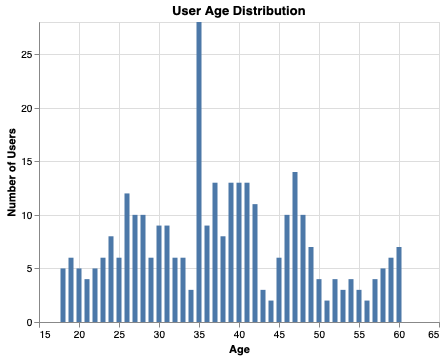

In [41]:
alt.Chart(media_df_train).mark_bar().encode(
    alt.X("Age"),
    alt.Y("count()", title = "Number of Users"),
).properties(title = "User Age Distribution")

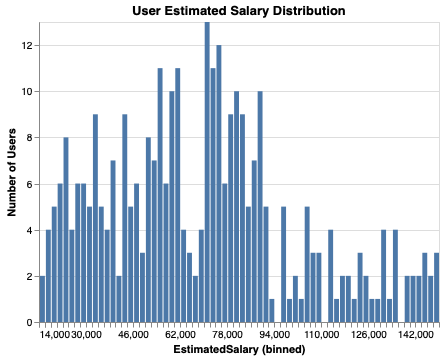

In [47]:
alt.Chart(media_df_train).mark_bar().encode(
    alt.X("EstimatedSalary", bin=alt.Bin(maxbins=100)),
    alt.Y("count()", title = "Number of Users"),
).properties(title = "User Estimated Salary Distribution")

In [ ]:
alt.Chart(spotify_df).mark_bar(opacity = 0.5).encode(
        alt.X(i, bin=alt.Bin(maxbins=30)),
        alt.Y('count()', stack=None),
        color=alt.Color('target', scale=alt.Scale(scheme='goldorange'))
    ).properties(width=400, height = 200)